In [1]:
import uproot4
from matplotlib import pyplot as p
from hist import Hist
import hist
import awkward1 as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

# Pretty printing arrays
from pprint import pprint

In [2]:
cd /home/pipi/newyr/g4e/g4e-dev/examples

/home/pipi/newyr/g4e/g4e-dev/examples


In [3]:
def plot_graphs(detector_name,xlim,ylim,zlim):
    hit_z_e=hit_z.mask[hit_vol[:,:,:len(detector_name)]==detector_name]
    hit_x_e=hit_x.mask[hit_vol[:,:,:len(detector_name)]==detector_name]
    hit_y_e=hit_y.mask[hit_vol[:,:,:len(detector_name)]==detector_name]
    h_cb = Hist(
    hist.axis.Regular(50, -xlim, xlim, name="X", label="x [cm]", flow=False),
    hist.axis.Regular(50, -ylim, ylim, name="Y", label="y [cm]", flow=False),
    )

    h_cb.fill(ak.to_numpy(ak.flatten(hit_x_e/10)),
           ak.to_numpy(ak.flatten(hit_y_e/10)))
    z_trk= Hist(
    hist.axis.Regular(50, -zlim, zlim, name="X", label="x [cm]", flow=False),)
    z_trk.fill(ak.to_numpy(ak.flatten(hit_z_e/10)))
    
    return h_cb,z_trk
    

In [4]:
file=uproot4.open("my_root_instead_of_simple_run.root")

# To see all object names in the file:
file.items()

[('events;5', <TTree 'events' (65 branches) at 0x7f5ff4dce670>),
 ('events;4', <TTree 'events' (65 branches) at 0x7f5fed122370>)]

In [5]:
# File has a data tree called 'events'
# get events tree as a separate thing
tree = file["events"]

# Print number of entries
print(f"Number of entries: {tree.num_entries}")

#Uncomment this to see all values:
#tree.show()


# More TBranch functions:
#https://uproot.readthedocs.io/en/latest/uproot.behaviors.TBranch.TBranch.html

Number of entries: 489


In [10]:
# To load WHOLE data from a branch as an array:
hit_id = tree['hit_id'].array()
hit_x = tree['hit_x'].array()
hit_y = tree['hit_y'].array()
hit_z = tree['hit_z'].array()
hit_vol = tree['hit_vol_name'].array()

In [14]:
u, v=plot_graphs('cb_EMCAL',-250,-250,50)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f5fb1849640>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f5fb1849a30>)

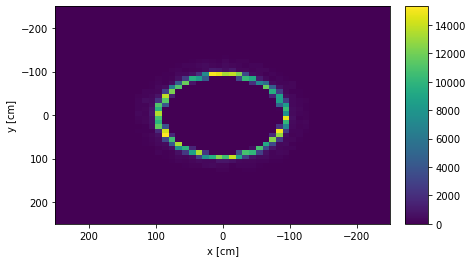

In [15]:
u.plot()

[StepArtists(step=<matplotlib.lines.Line2D object at 0x7f5fea84c220>, errorbar=None, legend_artist=None)]

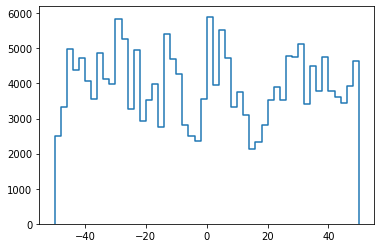

In [16]:
v.plot()

In [17]:
f, g=plot_graphs('ci_EMCAL',-250,-250,50)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f5fec2e5880>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f5fec2f4820>)

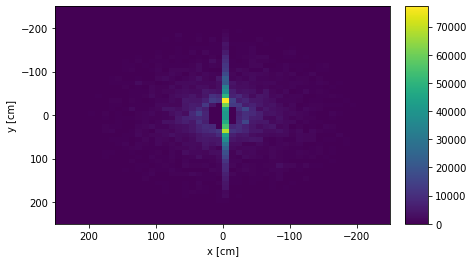

In [21]:
f.plot()


[StepArtists(step=<matplotlib.lines.Line2D object at 0x7f5fec31b700>, errorbar=None, legend_artist=None)]

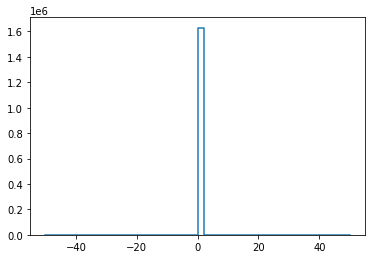

In [20]:
g.plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f5fec22de80>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f5fec22d280>)

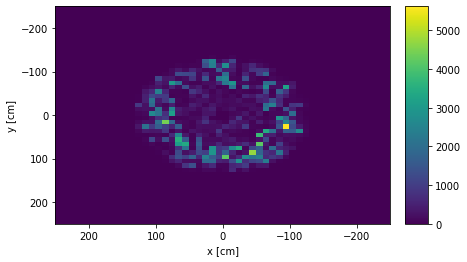

In [23]:
q,r=plot_graphs('ce_EMCAL',-250,-250,50)
q.plot()